[800, 848.0, 864.96, 860.2546176000001, 842.717029268057, 818.4275589896245, 790.9837085357275, 762.36667858269, 733.6329278390999, 705.3362247112253, 677.7611312644558, 651.047758782381, 625.2580142496819, 600.4110361856881, 576.502409893999, 553.5147575594449, 531.4236732307545, 510.2011021408521, 489.81729178906295, 470.24193060211417, 451.4448164961663, 433.39624898808984, 416.0672562896923, 399.42972257637103, 383.456454176635, 368.12120806008585, 353.39869693000026, 339.26457979190434, 325.69544356678557, 312.6687792829732, 300.1629551109573, 288.1571877031732, 276.631512787986, 265.56675563573526, 254.94450179837574, 244.74706838171613, 234.95747601455207, 225.55942161561637, 216.53725201661285, 207.87593847077108, 199.561052056843, 191.57873997526352, 183.91570272431952, 176.5591721382697, 169.4968902655134, 162.71708906249685, 156.2084708776351, 149.96018969881814, 143.96183313784962, 138.20340512528875, 132.67530928952425, 127.36833299443106, 122.27363201059083, 117.382715795

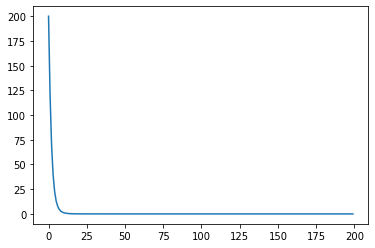

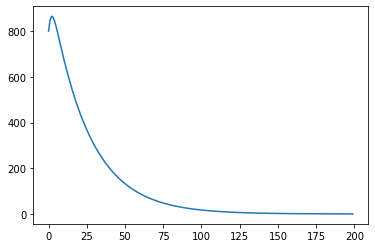

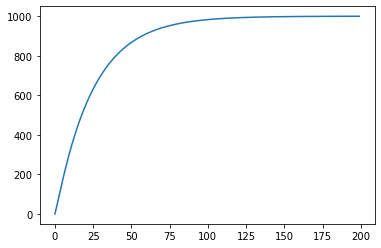

In [141]:
import numpy as np
import csv
from scipy.optimize import minimize
import matplotlib
from matplotlib import pyplot as plt 

# a=10;
# b=1.25;
# h=0.05;
# s=[10];
# I=[90];
# R=[0];
# nStep=140;
# N=[100];
# day=linspace(0,7,141);

# x = np.array([10])
# x[0]=1

# nominal state 
# How S changes: 𝑑𝑆/𝑑𝑡=−𝑎𝑆𝐼/𝑁
# How I changes: 𝑑𝐼/𝑑𝑡=𝑎𝑆𝐼/𝑁-𝐼/𝑏
# How R changes: 𝑑𝑅/𝑑𝑡=𝐼/𝑏
# 𝑁=𝑆+𝐼+𝑅

a=10
b=1.25
h=0.05
# cr = contact rate 
cr= a * h

# time /day
t=10
# total step

step=int(t*1/h)



# x=list(range(0,t))
# print(x,x[0],x[-1],)

S=list(range(0,step)); S[0]=200
I=list(range(0,step)); I[0]=800
R=list(range(0,step)); R[0]=0
𝑁=𝑆[0]+𝐼[0]+𝑅[0]

# print(S,S[0],S[9]); print(len(S)); print(s[-1])
# print(S,S[0],S[1])
# print(I,I[0],I[1])
# print(R,R[0])

for i in range(1,step):
#     print(i,S[i],I[i],R[i])
    S[i]= S[i-1] - h * (a * S[i-1] * I[i-1] / N)
    I[i]= I[i-1] + h * (a * S[i-1] * I[i-1] / N - I[i-1]/b)
    R[i]= R[i-1] + h * (I[i-1]/b)
#     print(i,S[i],I[i],R[i])
#     print()
print(I)
x=list(range(0,step))
plt.plot(x,S)
plt.show()
plt.plot(x,I)
plt.show()
plt.plot(x,R)
plt.show()

2 3
40
[0, 13.05, 22.612000000000002, 30.563413333333333, 33.50564747608333, 36.45336280142908, 39.36118555633287, 42.201298519384515, 44.958023546302755, 47.6233966209475, 50.19414232693627, 52.66976805181545, 55.05140748633165, 57.341128730769135, 59.54152124900478, 61.65544837117636, 63.685898139334775, 65.63589296748712, 67.50843482484242, 69.3064721172182, 71.03287997488627, 72.69044891420981, 74.28187877986016, 75.80977604216112, 77.27665323601589, 78.68492976739326, 80.03693358813605, 81.3349034137798, 82.58099127047737, 83.77726522931334, 84.92571223358289, 86.02824095591416, 87.08668464303807, 88.10280392012233, 89.07828953618437, 90.014765038671, 90.91378936982316, 91.77685938058058, 92.60541225995965, 93.40082787935201, 94.16443105224144, 94.8974937105613, 95.60123699940814, 96.27683329215691, 96.92540812823594, 97.54804207594857, 98.14577252279668, 98.71959539578715, 99.27046681419641, 99.79930467724054, 100.30699018905558, 100.79436932333819, 101.26225422993578, 101.711424

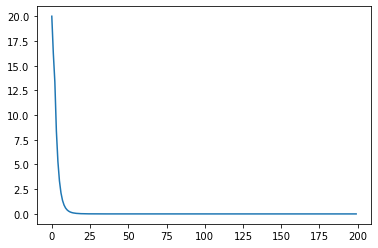

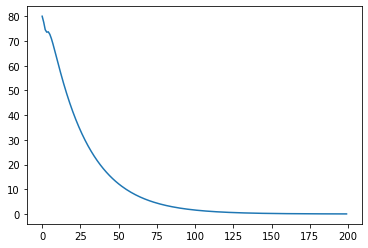

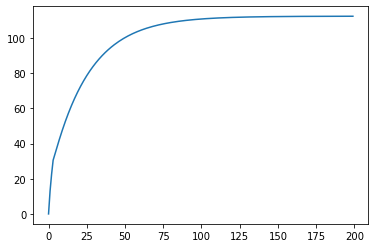

In [146]:
import numpy as np
import csv
from scipy.optimize import minimize
import matplotlib
from matplotlib import pyplot as plt 

a=10
b=1.25
h=0.05
# cr = contact rate 
cr= a * h

# time /day
t=10
# total step

step=int(t*1/h)



# x=list(range(0,t))
# print(x,x[0],x[-1],)

S=list(range(0,step)); S[0]=20
I=list(range(0,step)); I[0]=80
R=list(range(0,step)); R[0]=0
𝑁=𝑆[0]+𝐼[0]+𝑅[0]

# print(S,S[0],S[9]); print(len(S)); print(s[-1])
# print(S,S[0],S[1])
# print(I,I[0],I[1])
# print(R,R[0])

alpha = 0.15
IR = 0.2

b2=b/2
m=10
n=10
a2=5
v=5

PL1=0
PL2=0

for i in range(1,step):
    # PL1 and PL2 both triggered
    if S[i-1]/N > alpha and (h * (a * S[i-1] * I[i-1] / N - I[i-1]/b)) > IR:
        c =( m+n )/ m
        m = m+n
        
        S[i]= S[i-1] - h * (a2 * S[i-1] * I[i-1] / N - v )
        I[i]= I[i-1] + h * (a2 * S[i-1] * I[i-1] / N - I[i-1]/b2)
        R[i]= R[i-1] + h * (c * I[i-1]/b2 + v)
        
        PL1=PL1+1
        PL2=PL2+1
    # PL1 triggered
    elif S[i-1]/N > alpha :
        S[i]= S[i-1] - h * (a2 * S[i-1] * I[i-1] / N - v)
        I[i]= I[i-1] + h * (a2 * S[i-1] * I[i-1] / N - I[i-1]/b2 )
        R[i]= R[i-1] + h * (I[i-1]/b2 + v)
        
        PL1=PL1+1
    # PL2 triggered     
    elif h * (a * S[i-1] * I[i-1] / N - I[i-1]/b)> IR : 
        c =( m+n )/ m
        m = m+n
        
        S[i]= S[i-1] - h * (a * S[i-1] * I[i-1] / N)
        I[i]= I[i-1] + h * (a * S[i-1] * I[i-1] / N - I[i-1]/b2)
        R[i]= R[i-1] + h * (c * I[i-1]/b2)
        
        PL2=PL2+1
    #     nominal state
    else:
        S[i]= S[i-1] - h * (a * S[i-1] * I[i-1] / N)
        I[i]= I[i-1] + h * (a * S[i-1] * I[i-1] / N - I[i-1]/b)
        R[i]= R[i-1] + h * (I[i-1]/b)

print(PL1,PL2)
print(m)        
print(R)        
x=list(range(0,step))
plt.plot(x,S)
plt.show()
plt.plot(x,I)
plt.show()
plt.plot(x,R)
plt.show()
